# DS NN Training

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K # Tensorflow
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import os, fnmatch
import seaborn as sns
import matplotlib.pyplot as plt

C:\Secondary_Program_Folder\envs\DeepLearningLearning1\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Step 1: Read data

In [2]:
def read_data_set(data_set):
    list_ = []
    pin_id = ['1','2','3','4','5','6','7','8'] # Electrode(Pin) id names
    # Find Measurement(x).csv files in folder =======================================
    pattern = '*.csv'
    directory_path = 'C:\\Users\\Alex\\Desktop\\DS DNN basic functions\\10_300'
    directory = os.listdir('C:\\Users\\Alex\\Desktop\\DS DNN basic functions\\10_300')# Import directory's file names
    sum_files = 0
    files = [] # Create the list of Measurement files
    for file in directory:
        if fnmatch.fnmatch(file, pattern): # Check if True -> "file.pattern"
            data = pd.read_csv(directory_path+"\\"+file, delimiter=';', header=None)
            data.index = pin_id # Chenge index pin id number
            list_.append(data) # Put all data in a list for later use
            files.append(file) # 
            sum_files += 1 
    data_set = pd.concat(list_)# Make the list a dataframe
    data_set.columns = ['50khZ','100khZ','150khZ','200khZ','250khZ','300khZ','350khZ','400khZ','450khZ','500khZ']
    data_set.index.name = 'Pin'
    print ("Size of DataFrame:", data_set.shape)
    print ('Path: ',directory_path)
    print ('Imported files for Training :', files)
    return data_set

## Step 2: Create Training set from data

In [3]:
def train_data_handling(train_data_set): 
    train_set_1 = data_set.iloc[:,0:5].copy() # Split data_set in half
    train_set_1.columns=['x1', 'x2', 'x3', 'x4', 'x5'] # Change name of columns for the concat
    train_set_1['y'] = 0 # Give an outpot label to each set(row)
    
    train_set_2 = data_set.iloc[:,5:10].copy()
    train_set_2.columns=['x1', 'x2', 'x3', 'x4', 'x5']
    train_set_2['y'] = 1
    
    train_data_set = pd.concat([train_set_1, train_set_2])
    
    #X: Input, Y: Output
    X, Y = train_data_set.drop('y', axis=1).values , train_data_set['y'].values
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
    
    return train_data_set, X_train, X_test, y_train, y_test

## Step 3: Train NN

In [4]:
def train_NN(x,l1,l2,l3,a1,a2,a3,ep,i):
    # Model, Layers
    model = Sequential()
    model.add(Dense(l1, input_dim=x, activation=a1))
    model.add(Dense(l2, activation=a2))
    model.add(Dense(l3, activation=a3))
    # Model Train
    accuracy_train, accuracy_test = [], []
    for iterations in range(i):
        # Model initialization
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']);
        model.fit(X_train, Y_train, epochs=ep, shuffle=True, verbose=0)
        # Model test
        score_train = model.evaluate(X_train, Y_train)
        score_test = model.evaluate(X_test, Y_test)
        accuracy_train.append(score_train[1]*100) # Keep scores for visual
        accuracy_test.append(score_test[1]*100) # Keep scores for visual
        
    #print("\n%s: %.2f%%" % ('Train Accuracy', score_train[1]*100))
    #print("\n%s: %.2f%%" % ('Test Accuracy', score_test[1]*100))
    #print(accuracy_train)
    #print(accuracy_test)
    #model.summary()
    return score_train, score_test, accuracy_train, accuracy_test, model

## Step 4: Visual

In [5]:
def visual(): 
    val_train = pd.DataFrame(accuracy_train)
    val_train['score_type'] = 'Train accuracy'
    val_test = pd.DataFrame(accuracy_test)
    val_test['score_type'] = 'Test accuracy'
    val = pd.concat([val_train, val_test])
    val.columns = ['Accuracy%', 'Error type']
    val.index.name = 'Iteration'
    
    fg1 = sns.pointplot(x=val.index, y='Accuracy%', data=val, hue='Error type')
    plt.show()
    return 

## MAIN

Size of DataFrame: (160, 10)
Path:  C:\Users\Alex\Desktop\DS DNN basic functions\10_300
Imported files for Training : ['Meas (1).csv', 'Meas (10).csv', 'Meas (11).csv', 'Meas (12).csv', 'Meas (13).csv', 'Meas (14).csv', 'Meas (15).csv', 'Meas (16).csv', 'Meas (17).csv', 'Meas (18).csv', 'Meas (19).csv', 'Meas (2).csv', 'Meas (20).csv', 'Meas (3).csv', 'Meas (4).csv', 'Meas (5).csv', 'Meas (6).csv', 'Meas (7).csv', 'Meas (8).csv', 'Meas (9).csv']
 32/106 [========>.....................] - ETA: 0s

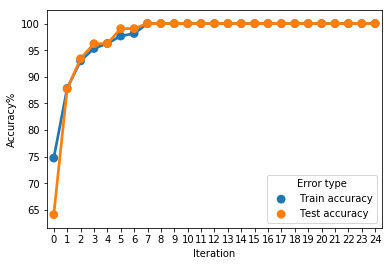

In [6]:
# Step1: Read & Manipulate data
data_set = pd.DataFrame()
data_set = read_data_set(data_set)
#display(data_set) # only jupyter notebook

# Step2: Data Handling for NN Model
# If sample is 50-250kHz, Output(y)=0, If sample is 300-500kHz, Output(y)=1
train_data_set = pd.DataFrame()
train_data_set, X_train, X_test, Y_train, Y_test = train_data_handling(train_data_set)

# Step3: Train NN Model 
# x:Input dimesnsions, l:Layer size, a:Activation function, ep:Epochs, i:Training iterations
score_train, score_test, accuracy_train, accuracy_test, model = train_NN(
    x=5,l1=4,l2=4,l3=1,a1='relu',a2='relu',a3='sigmoid',ep=50, i=25)

#K.clear_session() # Clear model's parameters (Do not use if a prediction is needed)

# Step4: Visual NN's Train and Test accuracy
visual() 

## Prediction

In [7]:
# Classify all values in "TEST Data Set"
correct = 0 
for i in range(X_test.shape[0]):
    data = np.array(X_test[i])
    data = np.reshape(data, (1,5))
    prediction = model.predict(data)
    if int(prediction)==Y_test[i]: correct += 1 
        
#K.clear_session() # Clear model's parameters
    
print('Correctly Classified samples: ', correct)
print('From a total number of %s' %X_test.shape[0]) 
print('\nClassifier Accuracy \non Test Data Set: %s %%' %( (correct/X_test.shape[0])*100) )

Correctly Classified samples:  96
From a total number of 106

Classifier Accuracy 
on Test Data Set: 90.56603773584906 %
